![header](https://drive.google.com/uc?export=view&id=1KuEspEp7OwqGw6uMRJvYE6BVE-Zo-8JF)

 <h1> <div align="center"> Dr. David Antonio-Torres</div> </h1>

# Introducción a Redes Neuronales con Keras
### Se intentará resolver un dataset de Scikit-Learn de clasificación binaria usando una neurona y, posteriormente, se añadirán más neuronas para mejorar la clasificación.


# Se cargan las bibliotecas necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Se carga el dataset *make_moons* de Scikit-Learn con 1500 muestras
### https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html

In [2]:
from sklearn import datasets

noisy_moons = datasets.make_moons(n_samples=2000, noise=.05)
X, y = noisy_moons
print(X.shape)
print(y.shape)

(2000, 2)
(2000,)


<Axes: >

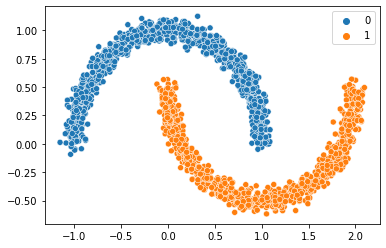

In [4]:
# Feature #1, feature #2, mientras y da el color de las dos clases
sns.scatterplot(x=X[:, 0],y=X[:, 1], hue = y)

In [5]:
y

array([1, 1, 1, ..., 1, 1, 0])

# Se crean los sets de entrenamiento y de prueba y se escalan ambos sets de features entre 0 y 1
### https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# 25% para el set de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
# Se escala el set de entrenamiento
scalar = MinMaxScaler()
scalar.fit(X_train)
X_train_scaled = scalar.transform(X_train)
# Se escala el set de prueba
scalar = MinMaxScaler()
scalar.fit(X_test)
X_test_scaled = scalar.transform(X_test)

<Axes: >

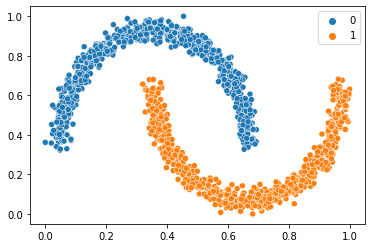

In [8]:
# Se grafican los datos escalados
sns.scatterplot(x=X_train_scaled[:, 0], y=X_train_scaled[:, 1], hue=y_train)

# Se cargan las bibliotecas necesarias para definir la red neuronal

In [9]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Una sola neurona con dos entradas, una salida.

In [10]:
model = Sequential()
model.add(Dense(units=1, input_dim=2, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy',  metrics=['accuracy'])

In [11]:
hist = model.fit(x=X_train_scaled, y=y_train, verbose=2, batch_size=50,epochs=100, shuffle='true')

Epoch 1/100
30/30 - 4s - loss: 0.5832 - accuracy: 0.7953 - 4s/epoch - 124ms/step
Epoch 2/100
30/30 - 0s - loss: 0.5375 - accuracy: 0.8733 - 80ms/epoch - 3ms/step
Epoch 3/100
30/30 - 0s - loss: 0.5014 - accuracy: 0.8773 - 65ms/epoch - 2ms/step
Epoch 4/100
30/30 - 0s - loss: 0.4721 - accuracy: 0.8800 - 52ms/epoch - 2ms/step
Epoch 5/100
30/30 - 0s - loss: 0.4464 - accuracy: 0.8773 - 51ms/epoch - 2ms/step
Epoch 6/100
30/30 - 0s - loss: 0.4250 - accuracy: 0.8740 - 53ms/epoch - 2ms/step
Epoch 7/100
30/30 - 0s - loss: 0.4062 - accuracy: 0.8760 - 49ms/epoch - 2ms/step
Epoch 8/100
30/30 - 0s - loss: 0.3899 - accuracy: 0.8740 - 61ms/epoch - 2ms/step
Epoch 9/100
30/30 - 0s - loss: 0.3758 - accuracy: 0.8733 - 52ms/epoch - 2ms/step
Epoch 10/100
30/30 - 0s - loss: 0.3634 - accuracy: 0.8713 - 51ms/epoch - 2ms/step
Epoch 11/100
30/30 - 0s - loss: 0.3526 - accuracy: 0.8707 - 51ms/epoch - 2ms/step
Epoch 12/100
30/30 - 0s - loss: 0.3431 - accuracy: 0.8747 - 50ms/epoch - 2ms/step
Epoch 13/100
30/30 - 0s -

# Se muestra un resumen del modelo, así como la evaluación de los resultados

In [12]:
# resumen del model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


Text(0.5, 0, 'Epoca')

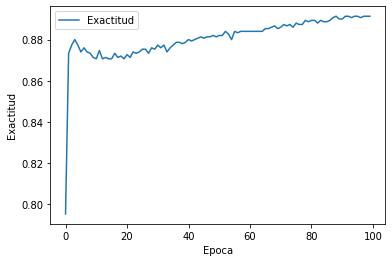

In [13]:
# Exactitud del modelo
plt.plot(hist.history['accuracy']) 
plt.legend(['Exactitud'])
plt.ylabel('Exactitud')
plt.xlabel('Epoca')

Text(0.5, 0, 'Epoca')

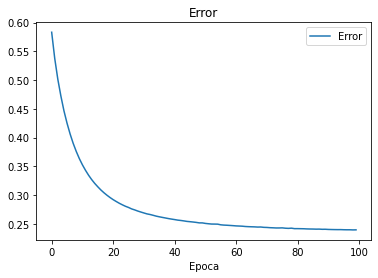

In [14]:
# Función de pérdida
plt.plot(hist.history['loss'])
plt.legend(['Error'])
plt.title('Error')
plt.xlabel('Epoca')

313/313 [==============================] - 0s 1ms/step


<ipython-input-15-899ef49886d6>:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_grid[y_grid == j, 0], X_grid[y_grid == j, 1],


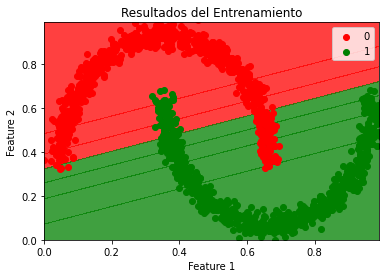

In [15]:
from matplotlib.colors import ListedColormap
X_grid, y_grid = X_train_scaled, y_train

X1, X2 = np.meshgrid(np.arange(start = X_grid[:, 0].min() , stop = X_grid[:, 0].max(), step = 0.01),
                     np.arange(start = X_grid[:, 1].min(), stop = X_grid[:, 1].max(), step = 0.01))

plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_grid)):
    plt.scatter(X_grid[y_grid == j, 0], X_grid[y_grid == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
    
plt.title('Resultados del Entrenamiento')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [16]:
# Se calculan las predicciones del modelo para graficar la matriz de confusión
# Se compara contra 0.5 para determinar si es clase 0 ó clase 1
# ya que la salida que da la función Sigmoid es continua entre 0 y 1
y_predict = (model.predict(X_test_scaled) > 0.5).astype("int32")

16/16 [==============================] - 0s 2ms/step


<Axes: >

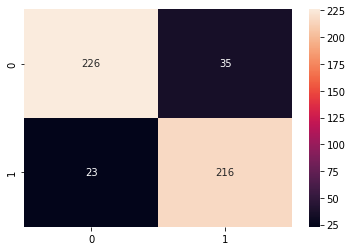

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, y_predict)

sns.heatmap(cm, annot=True, fmt="d")

# Se agregan dos capas de neuronas entre la entrada y salida y se repiten los pasos anteriores

In [18]:
model = Sequential()
# capa de oculta con 20 nodos
model.add(Dense(units=20, input_dim=2, activation='relu'))
# capa oculta con 10 neuronas
model.add(Dense(units=10, activation='relu'))
# capa oculta con 10 neuronas
model.add(Dense(units=10, activation='relu'))
# capa de salida con una neurona 
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy',  metrics=['accuracy'])

In [19]:
hist = model.fit(x=X_train_scaled, y=y_train, verbose=2, batch_size=50,epochs=100, shuffle='true')

Epoch 1/100
30/30 - 0s - loss: 0.5015 - accuracy: 0.8287 - 443ms/epoch - 15ms/step
Epoch 2/100
30/30 - 0s - loss: 0.2690 - accuracy: 0.8780 - 60ms/epoch - 2ms/step
Epoch 3/100
30/30 - 0s - loss: 0.2457 - accuracy: 0.8907 - 61ms/epoch - 2ms/step
Epoch 4/100
30/30 - 0s - loss: 0.2398 - accuracy: 0.8860 - 64ms/epoch - 2ms/step
Epoch 5/100
30/30 - 0s - loss: 0.2505 - accuracy: 0.8827 - 58ms/epoch - 2ms/step
Epoch 6/100
30/30 - 0s - loss: 0.2493 - accuracy: 0.8833 - 62ms/epoch - 2ms/step
Epoch 7/100
30/30 - 0s - loss: 0.2560 - accuracy: 0.8900 - 58ms/epoch - 2ms/step
Epoch 8/100
30/30 - 0s - loss: 0.2469 - accuracy: 0.8820 - 60ms/epoch - 2ms/step
Epoch 9/100
30/30 - 0s - loss: 0.2439 - accuracy: 0.8867 - 57ms/epoch - 2ms/step
Epoch 10/100
30/30 - 0s - loss: 0.2405 - accuracy: 0.8907 - 60ms/epoch - 2ms/step
Epoch 11/100
30/30 - 0s - loss: 0.2425 - accuracy: 0.8907 - 60ms/epoch - 2ms/step
Epoch 12/100
30/30 - 0s - loss: 0.2451 - accuracy: 0.8900 - 59ms/epoch - 2ms/step
Epoch 13/100
30/30 - 0s

In [20]:
# resumen del model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 20)                60        
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 391
Trainable params: 391
Non-trainable params: 0
_________________________________________________________________


Text(0.5, 0, 'Epoca')

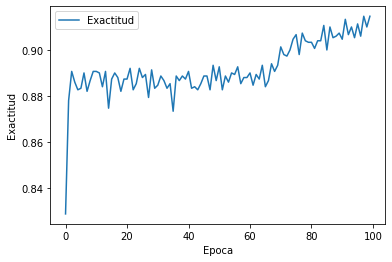

In [21]:
# Exactitud del modelo
plt.plot(hist.history['accuracy']) 
plt.legend(['Exactitud'])
plt.ylabel('Exactitud')
plt.xlabel('Epoca')

Text(0.5, 0, 'Epoca')

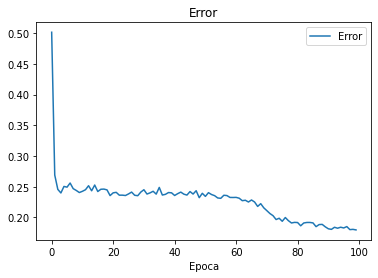

In [22]:
# Función de pérdida
plt.plot(hist.history['loss'])
plt.legend(['Error'])
plt.title('Error')
plt.xlabel('Epoca')

313/313 [==============================] - 1s 2ms/step


<ipython-input-23-899ef49886d6>:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_grid[y_grid == j, 0], X_grid[y_grid == j, 1],


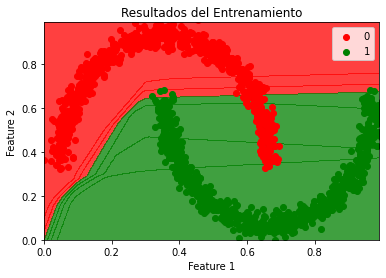

In [23]:
from matplotlib.colors import ListedColormap
X_grid, y_grid = X_train_scaled, y_train

X1, X2 = np.meshgrid(np.arange(start = X_grid[:, 0].min() , stop = X_grid[:, 0].max(), step = 0.01),
                     np.arange(start = X_grid[:, 1].min(), stop = X_grid[:, 1].max(), step = 0.01))

plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_grid)):
    plt.scatter(X_grid[y_grid == j, 0], X_grid[y_grid == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
    
plt.title('Resultados del Entrenamiento')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [24]:
# Se calculan las predicciones del modelo para graficar la matriz de confusión
# Se compara contra 0.5 para determinar si es clase 0 ó clase 1
# ya que la salida que da la función Sigmoid es continua entre 0 y 1
y_predict = (model.predict(X_test_scaled) > 0.5).astype("int32")

16/16 [==============================] - 0s 2ms/step


<Axes: >

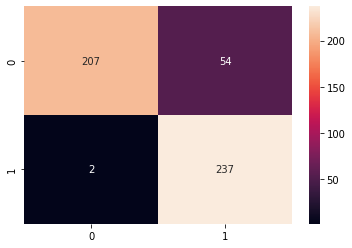

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, y_predict)

sns.heatmap(cm, annot=True, fmt="d")

# Gracias por la atención